In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import spikeinterface.full as si
from probeinterface.plotting import plot_probe
from probeinterface import read_probeinterface
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib ipympl

Matplotlib created a temporary cache directory at /tmp/matplotlib-qj4kjzi1 because the default path (/home/jupyter-ikharitonov/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# https://open-ephys.github.io/gui-docs/User-Manual/Recording-data/Binary-format.html

In [3]:
# https://github.com/SpikeInterface/probeinterface/issues/85

In [4]:
# IBL
# https://int-brain-lab.github.io/iblenv/notebooks_external/data_structure.html
# https://figshare.com/articles/preprint/Data_release_-_Brainwide_map_-_Q4_2022/21400815
# downloading https://dandiarchive.org/dandiset/000409/draft/files?location=sub-CSHL051
# https://ibl.flatironinstitute.org/public/

# ALTERNATIVELY
# Stream IBL data
# https://spikeinterface.readthedocs.io/en/latest/api.html#spikeinterface.extractors.read_ibl_streaming_recording

In [5]:
base_folder = Path.home() / 'RANCZLAB-NAS' / 'iakov' / 'allen_sorting_07_11_23'
output_folder = base_folder / 'kilosort3_sorting_files'
sorting_save_path = base_folder / 'kilosort3_sorting_output'

In [6]:
# https://spikeinterface.readthedocs.io/en/latest/api.html#spikeinterface.extractors.read_binary
# recording = si.read_binary(base_folder / 'test_recording2.dat', sampling_frequency=32000, dtype=np.int16, num_chan=384)
recording = si.read_binary(base_folder / 'spike_band.dat', sampling_frequency=32000, dtype=np.int16, num_chan=384)




# https://spikeinterface.readthedocs.io/en/latest/api.html#spikeinterface.extractors.read_openephys
# recording = si.read_openephys()

# https://spikeinterface.readthedocs.io/en/latest/api.html#spikeinterface.extractors.read_nwb
# recording = si.read_nwb(file_path = base_folder / 'sorting_pipeline_optimisation_oct_2023' / 'sub-CSHL051_ses-ecb5520d-1358-434c-95ec-93687ecd1396_behavior+ecephys+image.nwb')

# https://spikeinterface.readthedocs.io/en/latest/api.html#spikeinterface.extractors.read_ibl_streaming_recording
# recording = si.read_ibl_streaming_recording(session='ebe090af-5922-4fcd-8fc6-17b8ba7bad6d', stream_name='')

/opt/tljh/user/envs/jh_si_env/lib/python3.10/site-packages/spikeinterface/core/binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")


In [7]:
# https://github.com/SpikeInterface/probeinterface/blob/c874e8d03284e1b46d804cf4236b02b840516f53/src/probeinterface/probegroup.py

probegroup = read_probeinterface('np_json_files/np1.json')
probe = probegroup.probes[0]

In [8]:
probegroup.to_numpy()[0]

(0, 27., 0., 'square', 12., '0', '')

In [9]:
probegroup.probes[0]

Probe - 384ch - 1shanks

(<matplotlib.collections.PolyCollection at 0x7f61652a9810>, None)

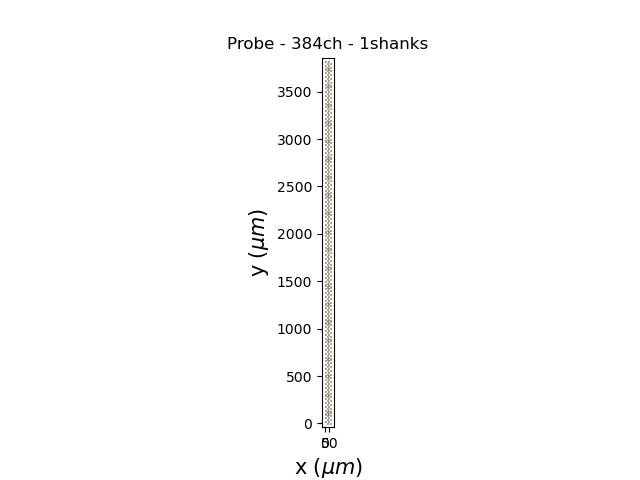

In [10]:
plot_probe(probe)

In [11]:
recording

BinaryRecordingExtractor: 384 channels - 32.0kHz - 1 segments - 257,175,972 samples 
                          8,036.75s (2.23 hours) - int16 dtype - 183.95 GiB
  file_paths: ['/home/jupyter-ikharitonov/RANCZLAB-NAS/iakov/allen_sorting_07_11_23/spike_band.dat']

In [12]:
recording = recording.set_probe(probe)

In [13]:
si.plot_traces({"rec": recording, "filt": recording_f, "common": recording_cmr}, mode='map', time_range=[0, 10], backend="ipywidgets")

NameError: name 'recording_f' is not defined

In [14]:
si.plot_traces(recording, time_range=[0, 0.5], channel_ids=[200,201], backend="ipywidgets")

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [14]:
recording_f = si.bandpass_filter(recording, freq_min=300, freq_max=9000)

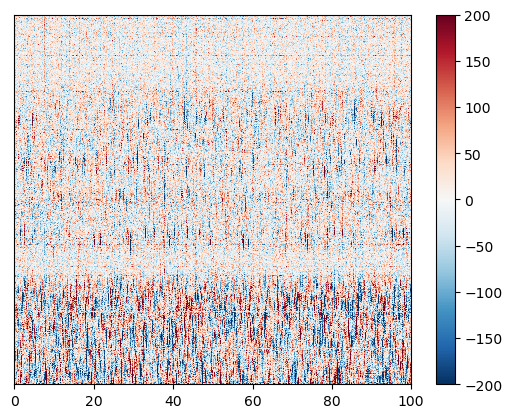

In [17]:
si.plot_traces(recording_f, mode='map', time_range=[0, 100], backend="matplotlib")

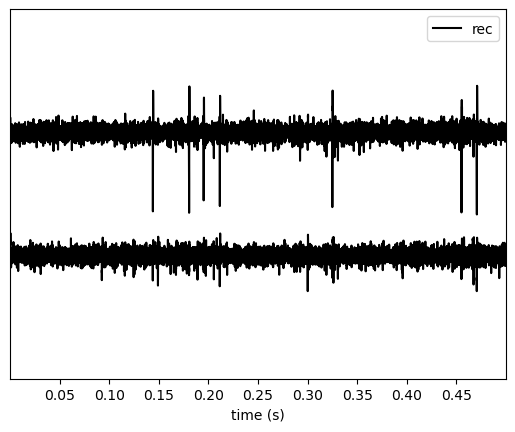

In [18]:
si.plot_traces(recording_f, time_range=[0, 0.5], channel_ids=[200,201], backend="matplotlib")

In [15]:
recording_cmr = si.common_reference(recording_f, reference='global', operator='median')

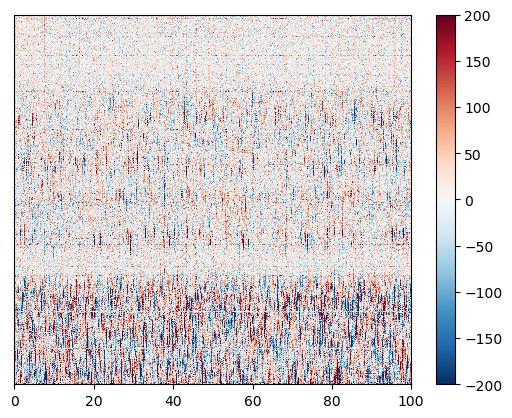

In [20]:
si.plot_traces(recording_cmr, mode='map', time_range=[0, 100], backend="matplotlib")

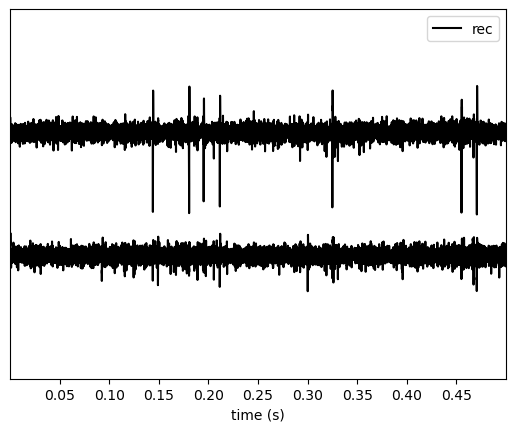

In [21]:
si.plot_traces(recording_cmr, time_range=[0, 0.5], channel_ids=[200,201], backend="matplotlib")

In [ ]:
sorting = si.run_sorter('kilosort3', recording=recording, output_folder=output_folder, singularity_image= Path.home() / 'RANCZLAB-NAS' / 'spikesorter_images' / 'kilosort3-compiled-base.sif', verbose=True)

Starting container
Installing spikeinterface from sources in /home/jupyter-ikharitonov/RANCZLAB-NAS/spikesorter_images/kilosort3-compiled-base.sif
Installing dev spikeinterface from remote repository
Running kilosort3 sorter inside /home/jupyter-ikharitonov/RANCZLAB-NAS/spikesorter_images/kilosort3-compiled-base.sif


In [ ]:
sorting.save(folder=sorting_save_path, format='npz_folder')

In [ ]:
w = si.plot_rasters(sorting, mode='map', time_range=[10, 10.1], backend="matplotlib")

In [ ]:
soring_curated = si.threshold_num_spikes(sorting, threshold=100, threshold_sign='less')

In [ ]:
si.export_to_phy(recording, sorting, output_folder='phy_output')

In [ ]:
si.export_to_phy?

In [ ]:
sorting.get_unit_ids()

In [ ]:
w_rs = si.plot_rasters(sorting, time_range=(90, 100), unit_ids=[x for x in range(sorting.get_unit_ids().shape[0])], backend='matplotlib', figsize=(10,5))